![](tec.png)



## **Análisis de Datos Masivos**
## Regresión lineal de datos del tráfico de Internet
## **Nombre del docente**
### José Gabriel Rodriguez Rivas
## **Nombre del alumno**
### Najib Alejandro Loera Rodriguez

Objetivos

En esta práctica de laboratorio se familiarizará con los conceptos de regresión y predicción y con el concepto de trabajar con datos.

**Parte 1: Importar las bibliotecas**

**Parte 2: Visualizar los datos históricos**

**Parte 3: Crear un modelo de regresión lineal simple - Polinomio de primer orden**

**Parte 4: Crear un modelo de regresión lineal simple - Polinomios de orden superior**

**Parte 5: Calcular los errores**

**Parte 6: Crear un modelo de regresión no lineal - Crecimiento exponencial**

**Parte 7: Comparar los modelos**

### Parte 1: Importar las bibliotecas

In [29]:


# Importar Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline



In [30]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

### Parte 2: Visualizar los datos históricos

Paso 1: Cargar datos históricos sobre el tráfico d Internet.

In [31]:
# Code cell 4
filename = 'internet_traffic_hist.csv'
df_hist = pd.read_csv(filename)
df_hist.head()

,traffic,year
0,100.000000,2005
1,126.933755,2006
2,160.303757,2007
3,203.390603,2008
4,241.292566,2009


Paso 2: Visualizar el volumen de tráfico de Internet.

Utilice las funciones matplotlib que ya aprendió para visualizar la evolución del volumen de tráfico año tras año.

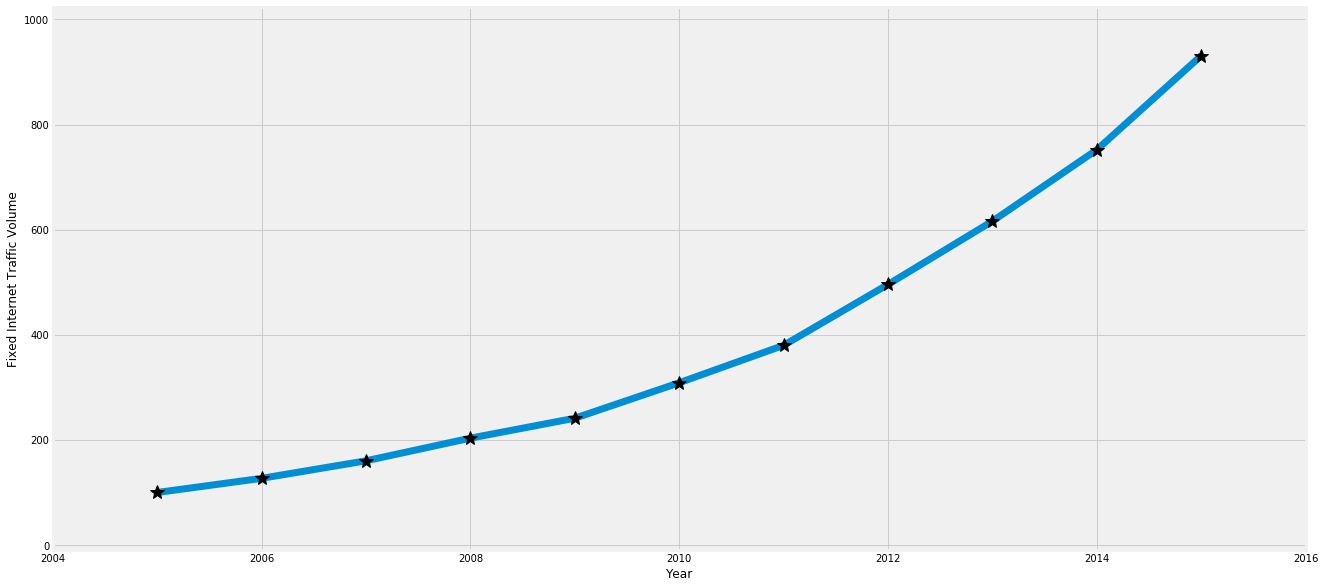

In [32]:


# Code cell 5
# Create a slightly bigger figure use all the available space
plt.figure(figsize = (20,10))

# XY Plot of year and traffic
x = df_hist.year
y = df_hist.traffic

# XY Plot of year and traffic
plt.plot(x, y, label =' ', linewidth = 7)
plt.plot(x, y,'*k', markersize = 14, label = '')

#Increase sligthly the axis sizes to make the plot more clear
plt.axis([x.iloc[0]-1, x.iloc[-1]+1, y.iloc[0]*-0.1,  y.iloc[-1]*1.1])

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')

# Increase default font size
plt.rcParams.update({'font.size': 26})
plt.show()



### Parte 3: Regresión lineal simple - Polinomio de primer orden

Paso 1: Superponer un modelo de regresión lineal simple con los datos históricos de Internet.

En Python, la función polyfit se utiliza desde la biblioteca numpy para adaptar un modelo de regresión polinómico de cualquier orden y encontrar los parámetros que minimicen el ECM.

Utilizará la familia de modelos polinómicos con un orden de 1, donde la variable del tráfico de Internet es (y) y el año es (x) .

La pendiente de la línea es 79.52710966245054.
La intersección y es -159457.12265835042.
La línea de regresión lineal simple que mejor se ajusta es 79.52710966245054x + -159457.12265835042.


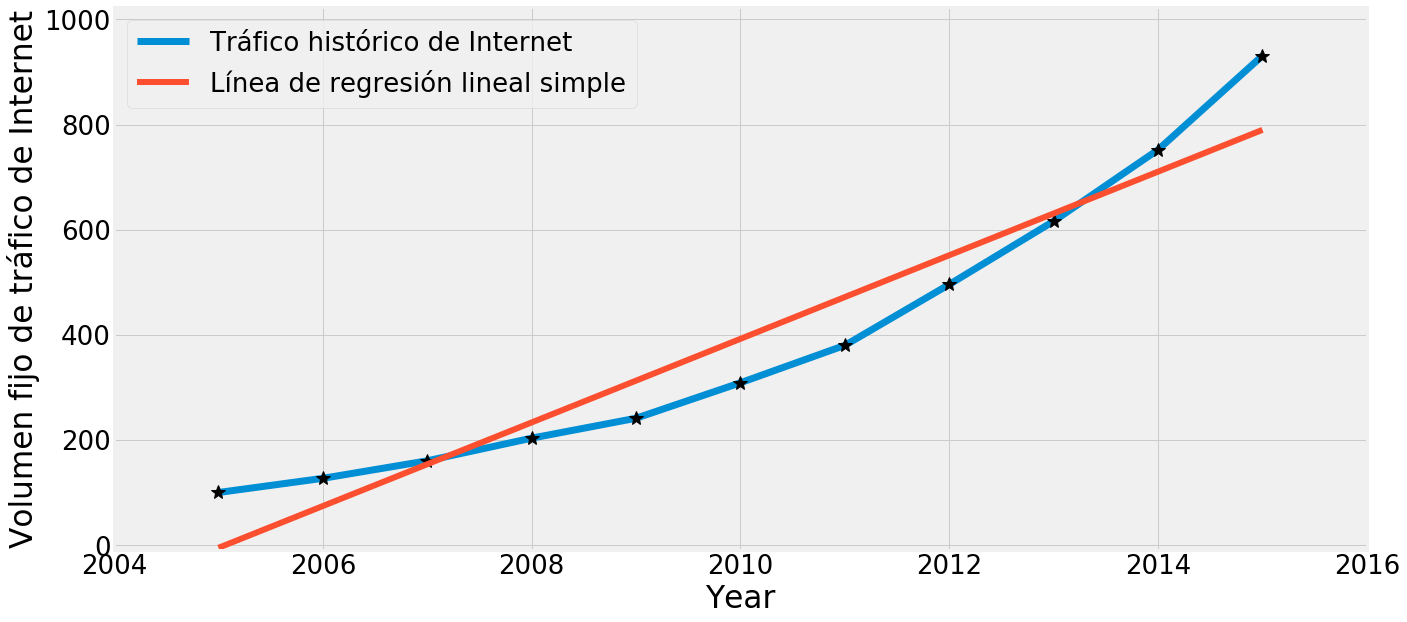

In [33]:


# Code cell 6
# Create a slightly bigger figure use all the available space
plt.figure(figsize = (20,10))

order = 1

# XY Plot of year and traffic
x = df_hist.year
y = df_hist.traffic

m, b = np.polyfit(x,y,order)

plt.plot(x, y, label = 'Tráfico histórico de Internet', linewidth = 7)
plt.plot(x, y,'*k', markersize = 15, label ='')
plt.plot(x, m*x + b, '-', label = 'Línea de regresión lineal simple', linewidth = 6)

print ('La pendiente de la línea es {}.'.format(m))
print ('La intersección y es {}.'.format(b))
print ('La línea de regresión lineal simple que mejor se ajusta es {}x + {}.'.format(m,b))


#Increase sligthly the axis sizes to make the plot more clear
plt.axis([x.iloc[0]-1, x.iloc[-1]+1, y.iloc[0]*-0.1, y.iloc[-1]*1.1])

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Volumen fijo de tráfico de Internet')
plt.legend(loc = 'upper left')


# Increase default font size
plt.rcParams.update({'font.size': 26})
plt.show()



### Parte 4: Regresión lineal simple - Polinomios de orden superior

Trazará modelos polinómicos con orden ascendente de 1 a 3 y observará la aptitud de los modelos. El polinomio con un orden de 1 ya se trazó en la parte anterior

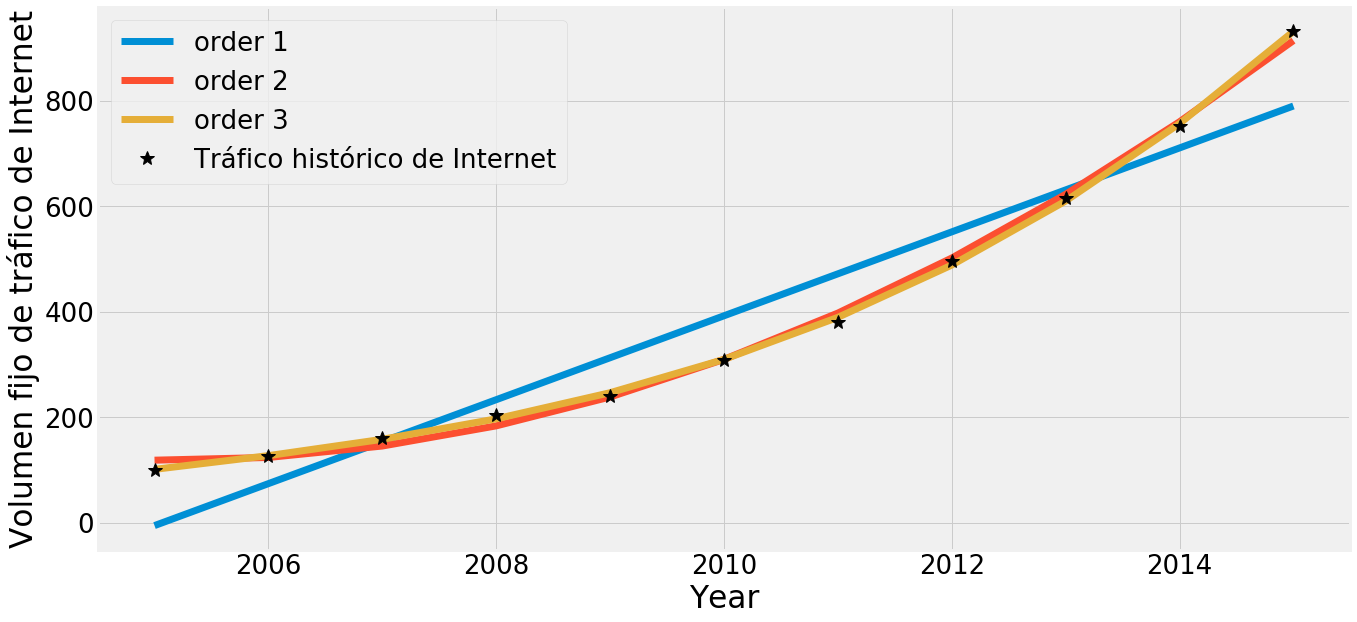

In [34]:
# Code cell 7
models = []       # to store polynomial model parameters (list of poly1d objects)
errors_hist = []  # to store the absolute errors for each point (2005-2015) and for each model (list of numpy arrays )
mse_hist = []     # to store the MSE for each model (list of numpy floats)

#Try polynomial models with increasing order
for order in range(1,4):
    # Fit polynomial model
    p = (np.poly1d(np.polyfit(x, y, order)))
    models.append(p)
    
plt.figure(figsize = (20,10))

# Visualize polynomial models fit
for model in models[0:3]:
    #x = df_hist.year.values      
    #y = df_hist.traffic.values   
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 7)

plt.plot(x, y, '*k', markersize = 14, label = 'Tráfico histórico de Internet', linewidth = 7)
plt.legend(loc = 'upper left')

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Volumen fijo de tráfico de Internet')

plt.show()

### Parte 5: Calcular los errores

Compare los errores y visualice la aptitud correspondiente a los diferentes modelos de regresión por errores.

Una vez dada la familia del modelo de regresión, el error cuadrático medio (o ECM) es una métrica de calidad de aptitud. La idea es que queremos que nuestra función polinómica se adapte a nuestros datos lo más posible

In [35]:
# Code cell 8
# Calculate and store the errors
models = []       # to store polynomial model parameters (list of poly1d objects)
errors_hist = []  # to store the absolute errors for each point (2005-2015) and for each model (list of numpy arrays )
mse_hist = []     # to store the MSE for each model (list of numpy floats)

#Try polynomial models with increasing order
for order in range(1,4):
    # Fit polynomial model
    p = (np.poly1d(np.polyfit(x, y, order)))
    models.append(p)
    
    e = np.abs(y-p(x))        # absolute error
    mse = np.sum(e**2)/len(df_hist) # mse
    
    errors_hist.append(e)   #Store the absolute errors
    mse_hist.append(mse) # Store the mse

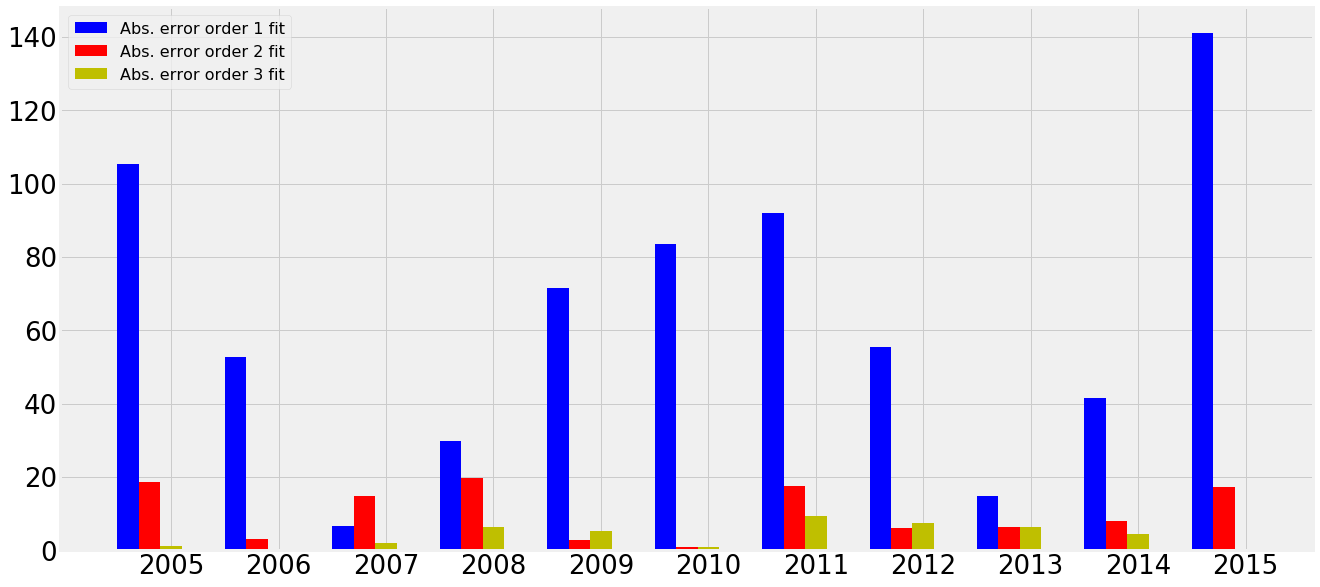

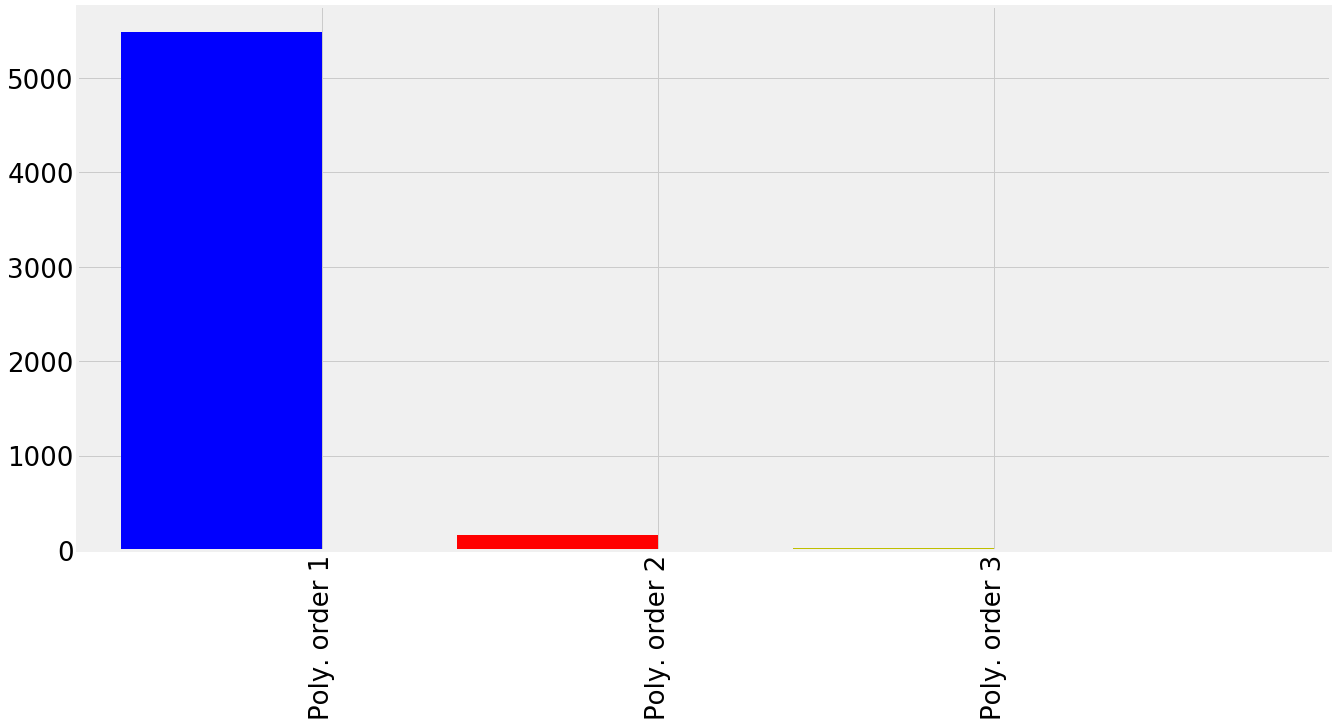

In [36]:


# Code cell 9
# Visualize fit error for each year

x = df_hist.year
width = 0.2   #size of the bar

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

p1 = ax.bar( x, errors_hist[0], width, color = 'b', label = 'Abs. error order 1 fit')
p2 = ax.bar( x + width, errors_hist[1], width, color = 'r', label = 'Abs. error order 2 fit')
p3 = ax.bar( x + 2*width, errors_hist[2], width, color = 'y', label = 'Abs. error order 3 fit')

# "Prettyfy" the bar graph
ax.set_xticks(x+2*width)
ax.set_xticklabels(x)
plt.legend(loc = 'upper left', fontsize =16)
plt.show()

#Visualise MSE for each model
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

x = np.array([0,1,2,3])
width = .6   #size of the bar

p1 = ax.bar( x[0], mse_hist[0], width, color = 'b', label = 'pred. error order 1 fit')
p2 = ax.bar( x[1], mse_hist[1], width, color = 'r', label = 'pred. error order 2 fit')
p3 = ax.bar( x[2], mse_hist[2], width, color = 'y', label = 'pred. error order 3 fit')

ax.set_xticks(x+width/2)
ax.set_xticklabels(['Poly. order 1', 'Poly. order 2', 'Poly. order 3'], rotation=90)
plt.show()

De acuerdo a los trazados anteriores, parece que el polinomio de tercer orden tiene la menor cantidad de errores, y que el error entre el segundo y el tercer orden es insignificante. Esto sugiere que el tercer polinomio es el mejor para los órdenes utilizados en esta práctica de laboratorio en este momento.

La función polyfit de Python de la biblioteca numpy puede adaptar un modelo de regresión polinómico de cualquier orden y encontrar los parámetros que minimicen el ECM. En la celda de código de abajo, el orden se define en 3.

In [37]:
# Code cell 10
# Polynomial function order
order = 3

x = df_hist.year.values      # regressor
y = df_hist.traffic.values   # regressand

# Fit the model, return the polynomial parameter values in a numpy array such that
# y = p[0]*x**order + p[1]*x*(order-1) ...

p_array = np.polyfit(x,y,order)

print(type(p_array), p_array)

# poly1d is a convenience class, used to encapsulate “natural” operations on polynomials 
# so that said operations may take on their customary form in code

# wrap the p_array in a poly1 object
p = np.poly1d(p_array)

print(type(p), p)

# use the poly1d object to evaluate the value of the polynomial in a specific point
print('El valor del polinomio para x = 2020 es: {} '.format(p(2020)))

# compute the absolute error for each value of x and the MSE error for the estimated polynomial model
e = np.abs(y-p(x))
mse = np.sum(e**2)/len(x)

print('Los parámetros polinómicos estimados son: {}'.format(p))
print('Los errores para cada valor de x, dados los parámetros polinómicos estimados son: \n {}'.format(e))
print('El MSE es :{}'.format(mse))

<class 'numpy.ndarray'> [ 4.83129478e-01 -2.90500623e+03  5.82252175e+06 -3.89005447e+09]
<class 'numpy.poly1d'>         3        2
0.4831 x - 2905 x + 5.823e+06 x - 3.89e+09
El valor del polinomio para x = 2020 es: 2328.578489780426 
Los parámetros polinómicos estimados son:         3        2
0.4831 x - 2905 x + 5.823e+06 x - 3.89e+09
Los errores para cada valor de x, dados los parámetros polinómicos estimados son: 
 [1.30741167 0.39123881 2.02723646 6.32983875 5.28393687 0.93069039
 9.41691354 7.3401094  6.27730606 4.48133075 0.16290853]
El MSE es :25.172183198833217


A partir de la salida del orden polinómico de 3, la ecuación pasa a ser la siguiente:
y=0.4831x3−2905x2+5.823∗106x−3.89∗109

### Parte 6: Modelo de regresión no lineal - Crecimiento exponencial

En esta práctica de laboratorio vamos a usar la biblioteca scipy.optimize y su función curvefit. La función curvefit requiere que se defina una función de curva y luego trata de encontrar los mejores parámetros para la función especificada utilizando el algoritmo de cuadrados mínimos no lineales.

In [38]:
# Code cell 11
# Non linear regression model fitting

# First, define the regression model function, in this case, we'll choose an exponential of the form y= a*(b^(x))
def my_exp_func(x, a, b):
    return a * (b ** x) 

x = np.arange(2016-2005)    # the regressor is not the year in itself, but the number of years from 2005
y = df_hist.traffic.values  # regressand

# use curve_fit to find the exponential parameters vector p. cov expresses the confidence of the 
# algorithm on the estimated parameters 
p, cov = curve_fit(my_exp_func, x, y)
e = np.abs(y - my_exp_func(x, *p))
mse = np.sum(e**2)/len(df_hist)

print('Los parámetros exponenciales estimados son: {}'.format(p))
print('Los errores para cada valor de x, dados los parámetros exponenciales estimados son: \n {}'.format(e))
print('El MSE es :{}'.format(mse))

models.append(p)

errors_hist.append(e) # Store the absolute error 
mse_hist.append(mse)

Los parámetros exponenciales estimados son: [103.37820148   1.24678465]
Los errores para cada valor de x, dados los parámetros exponenciales estimados son: 
 [ 3.37820148  1.95659906  0.39475809  3.03416216  8.50876833  2.65664482
  8.32850909 11.70265945 12.59154092  0.47531784  7.10276492]
El MSE es :47.23616366678741




El índice de crecimiento real r
correspondiente a los datos del tráfico de Internet fue 0,22 y el valor inicial a fue 100. Los valores estimados para estos parámetros son 103,38 y 1,2467−1=0,25. La discrepancia entre esos valores se debe a las variaciones anuales impredecibles. Los valores estimados de la función curve_fit están desfasados 13% para r y 3% para a. ¡Nada mal!

### Parte 7: Comparar modelos

Compare los errores y visualice la aptitud correspondiente a los diferentes modelos de regresión.

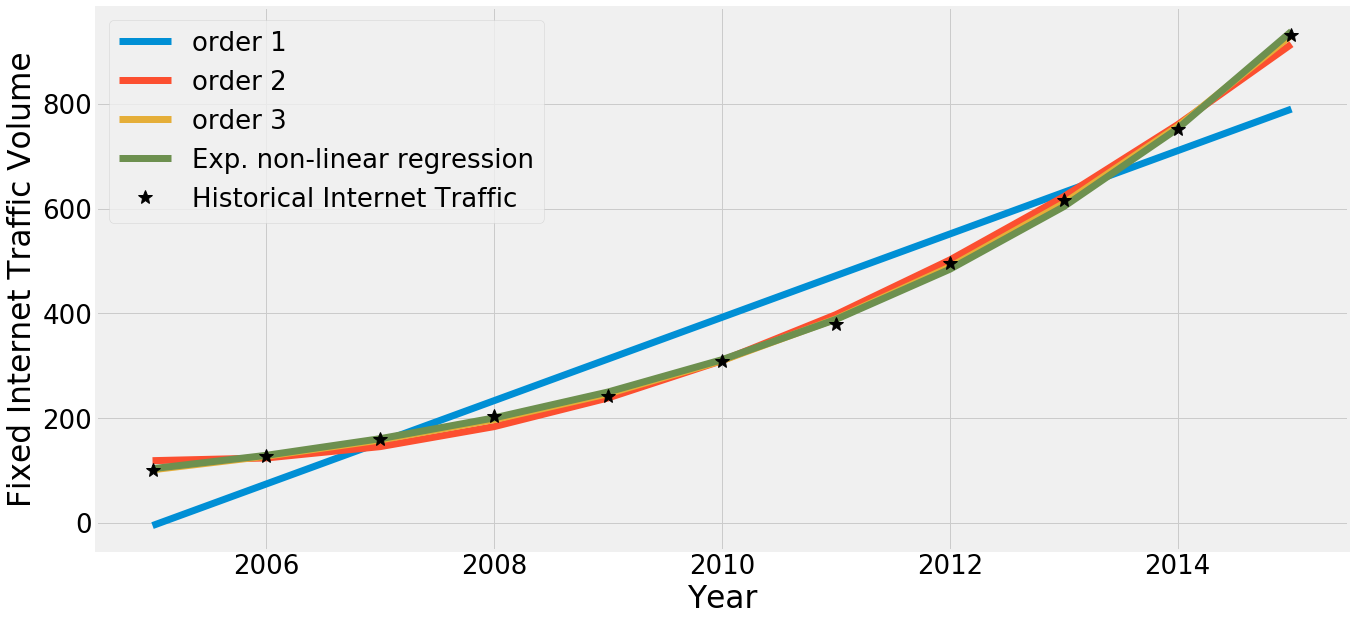

In [39]:
# Code cell 12
plt.figure(figsize = (20,10))

# Visualize polynomial models fit
for model in models[0:-1]:
    
    x = df_hist.year.values      
    y = df_hist.traffic.values   
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 7)
     

# Visualize exponenetial model fit
x = np.arange(2016-2005)    # the regressor is not the year in itself, but the number of years from 2005
plt.plot(df_hist.year.values, my_exp_func(x, *models[-1]), label = 'Exp. non-linear regression', linewidth = 7)

plt.plot(df_hist.year, df_hist.traffic, '*k', markersize = 14, label='Historical Internet Traffic')
plt.legend(loc = 'upper left')

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')
plt.show()

Para el rango seleccionado de años, la diferencia entre un modelo de regresión polinómico de segundo o tercer orden y el exponencial es insignificante. Visualicemos los errores reales.

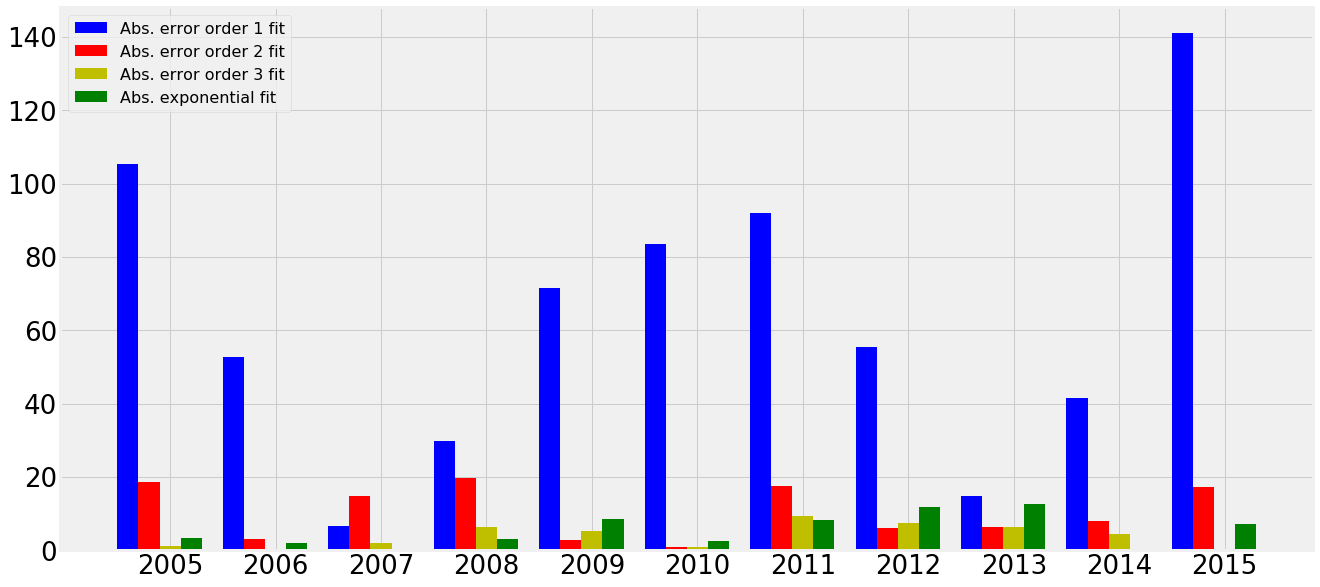

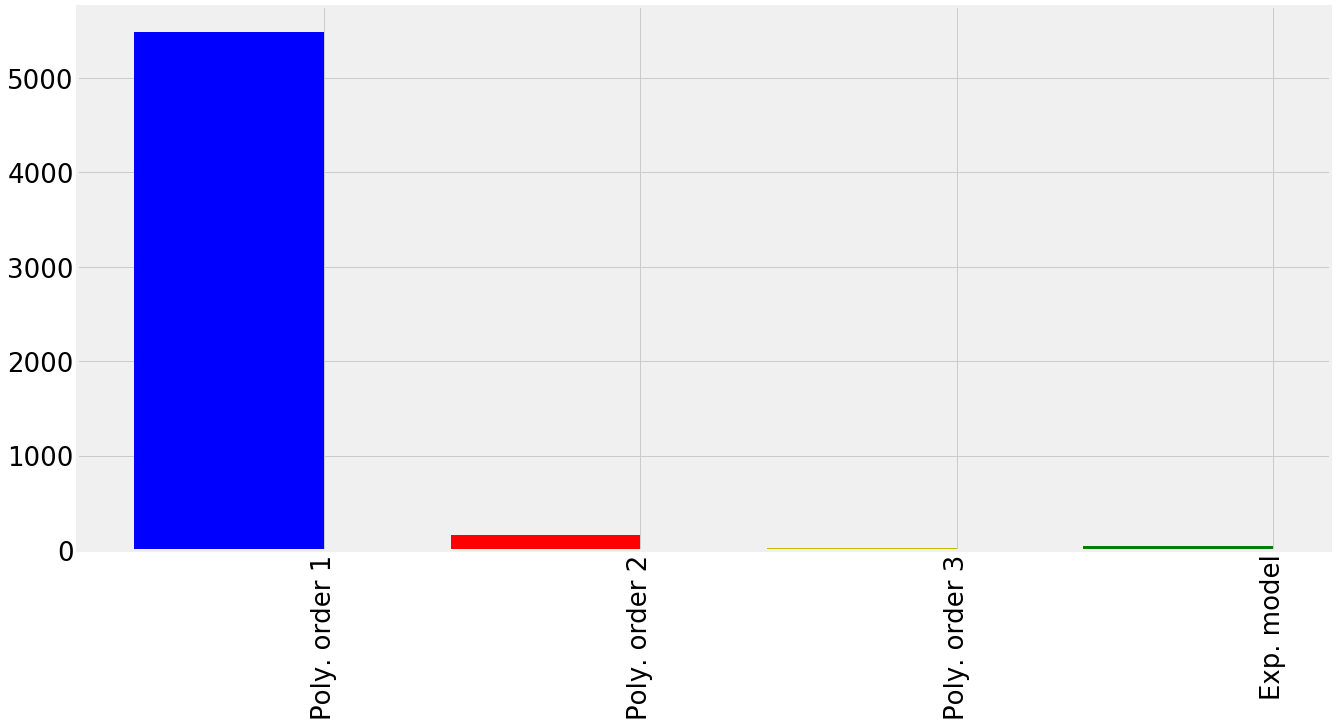

In [40]:
# Code cell 13
# Visualize fit error for each year

x = df_hist.year
width = 0.2   #size of the bar

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

p1 = ax.bar( x, errors_hist[0], width, color = 'b', label = 'Abs. error order 1 fit')
p2 = ax.bar( x + width, errors_hist[1], width, color = 'r', label = 'Abs. error order 2 fit')
p3 = ax.bar( x + 2*width, errors_hist[2], width, color = 'y', label = 'Abs. error order 3 fit')
p4 = ax.bar( x + 3*width, errors_hist[3], width, color = 'g', label = 'Abs. exponential fit')

# "Prettyfy" the bar graph
ax.set_xticks(x+2*width)
ax.set_xticklabels(x)
plt.legend(loc = 'upper left', fontsize =16)
plt.show()

#Visualise MSE for each model
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

x = np.array([0,1,2,3])
width = .6   #size of the bar

p1 = ax.bar( x[0], mse_hist[0], width, color = 'b', label = 'pred. error order 1 fit')
p2 = ax.bar( x[1], mse_hist[1], width, color = 'r', label = 'pred. error order 2 fit')
p3 = ax.bar( x[2], mse_hist[2], width, color = 'y', label = 'pred. error order 3 fit')
p4 = ax.bar( x[3], mse_hist[3], width, color = 'g', label = 'pred. exponential fit')

ax.set_xticks(x+width/2)
ax.set_xticklabels(['Poly. order 1', 'Poly. order 2', 'Poly. order 3', 'Exp. model' ], rotation=90)
plt.show()

### Parte 8: Utilizar un modelo de regresión para predecir valores futuros

En esta parte analizará los valores proyectados correspondientes al volumen de tráfico de Internet fijo. Como se asume que el índice de crecimiento fue el mismo para el período 2005-2015, los datos se generan y almacenan en el conjunto de datos internet_traffic_proj.csv. Cargue su contenido en un DataFrame de nombredf_proj y visualice las primeras filas

In [41]:
# Code cell 14
filename = 'internet_traffic_proj.csv'
df_proj = pd.read_csv(filename)
df_proj.head()



,traffic,year
0,931.200929,2015
1,1266.783122,2016
2,1427.662376,2017
3,1749.671543,2018
4,2281.869542,2019


Paso 2: Comparar errores de predicción en modelos lineales y no lineales.

Fusione los DataFrames df_proj y df_hist, y visualice cómo se comporta el modelo de regresión utilizado anteriormente al predecir valores futuros.

In [42]:
# Code cell 15
df = pd.concat([df_hist, df_proj]).reset_index()
df.drop('index', axis=1, inplace=True)
df = df.drop_duplicates() #The 2015 value is found in both the df_hist and df_proj df
df.head(20)

,traffic,year
0,100.000000,2005
1,126.933755,2006
2,160.303757,2007
3,203.390603,2008
4,241.292566,2009
5,308.791823,2010
6,379.980659,2011
7,495.840568,2012
8,616.207252,2013
9,752.103483,2014


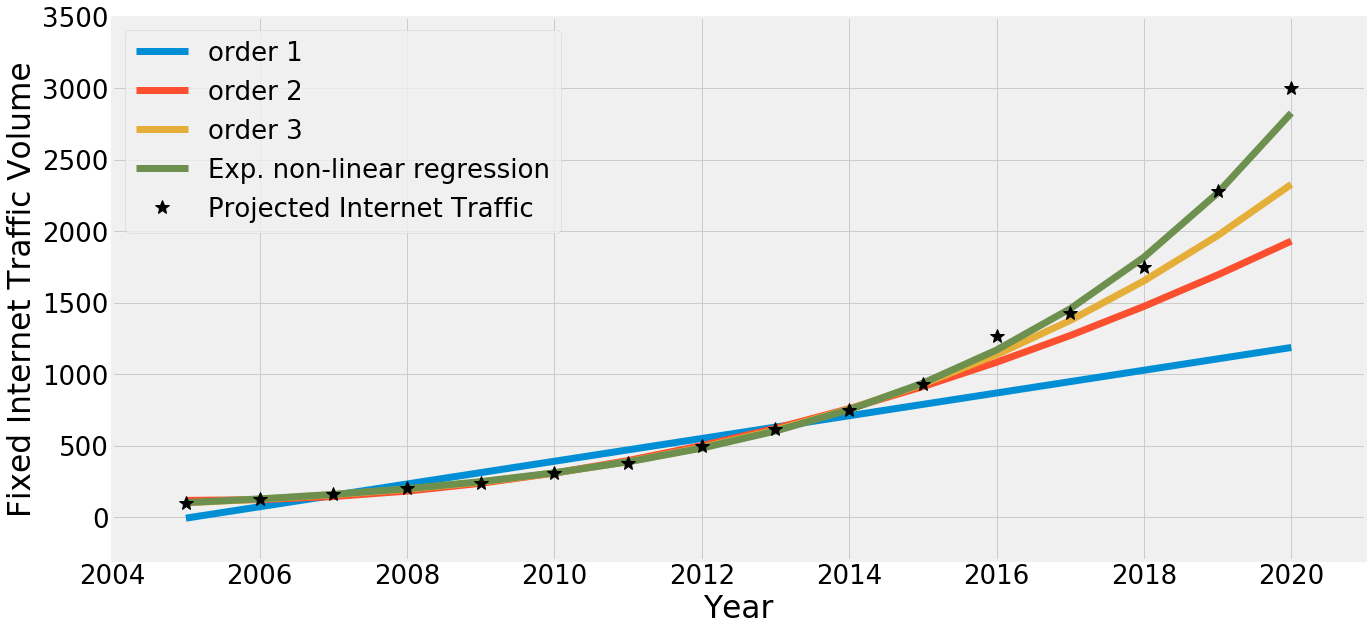

In [43]:
# Code cell 16
plt.figure(figsize = (20,10))

errors_all = []
mse_all = []

for model in models[0:-1]:
    
    # Visualize polynomial model fit
    x = df.year.values      
    y = df.traffic.values   
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 7)
    
    # error and mse for polynomial models
    pred_y = model(x)
    e = np.abs(y - pred_y)
    errors_all.append(e)   #Store the absolute errors
    mse_all.append(np.sum(e**2)/len(df)) # Store the mse
    
    
# Visualize exponential model fit
x = np.arange(2021-2005)    # the regressor is not the year in itself, but the number of years from 2005
pred_y = my_exp_func(x, *models[-1])
plt.plot(df.year.values, pred_y, label = 'Exp. non-linear regression', linewidth = 7)

# errors and mse for exponential model
e = np.abs(y - pred_y)
errors_all.append(e)   #Store the absolute errors
mse_all.append(np.sum(e**2)/len(df)) # Store the mse

plt.plot(df.year, df.traffic, '*k', markersize = 14, label='Projected Internet Traffic')
plt.legend(loc = 'upper left')

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')
plt.axis([2004,2021, -300, 3500])
plt.show()



¿A qué conclusiones puede llegar con respecto al modelo polinómico de tercer orden y al modelo exponencial?


**Respuesta:** Simplemente que es muy importante este modelo ya que  	se hace un prediccion de una variable de respuesta cuantitativa a partir de una variable predictora cuantitativa como se puede ver en el grafico final en el que se muestra el Volumen fijo de tráfico de Internet y el año ademas de los respectivos ordenes